# Compute the free energy by direct minimisation using a customised clique complex probability
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Content**
Summary of the progress so far.
- Optimisation for customised clique complex probability
- Comparision of free energy calculation methods
- HCP vs phase randomised data

**Import functions and data**

In [2]:
# Import necessary libraries
import numpy as np
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import external background functions
%run Week_16_functions.py

C:\Users\cyril\AppData\Local\Temp\ipykernel_15280\3417947097.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Import HCP data
matrices = [np.genfromtxt(file) for file in glob.glob('./1000_Functional_Connectomes/Connectivity matrices/*_matrix_file.txt')]

**Plot optimisation for custom clique complex probability** ~13min computation time for num_iterations = 10000, N_simulations = 100, cutoff = 0.7 and max_dim = 3

In [3]:
matrix = matrices[1]
cutoff = 0.7
max_dim = 3

In [18]:
# Example for generating energy and entropy data from a given matrix
num_iterations_free_energy = 1000
free_energies = []
free_energy_probabilities_test = []
N_simulations = 10

for _ in range(N_simulations):
    clique_complex = build_clique_complex_new(matrix, cutoff, max_dim)
    inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)[1]
    initial_probabilities = generate_probability_list(clique_complex, 'custom')
    free_energy_history, f_probabilities = simulated_annealing_free_energy(clique_complex, inverse_connectivity_matrix, num_iterations_free_energy, initial_temperature=1.0, cooling_rate=0.95)

    # Store probabilities type
    free_energies.append(free_energy_history)
    free_energy_probabilities_test.append(f_probabilities)

free_energies_average = [sum(x) / len(x) for x in zip(*free_energies)]
free_energy_probabilities_test_average = [sum(x) / len(x) for x in zip(*free_energy_probabilities_test)]

In [19]:
simplices_length = nodes_probabilities(clique_complex, distribution_type='custom')[0]

N_nodes = len(simplices_length[0])
N_edges = len(simplices_length[1])
N_triangles = len(simplices_length[2])

# Define the x-values to mark the transition
marker_x_values = [N_nodes, (N_nodes+N_edges), (N_nodes+N_edges+N_triangles)]

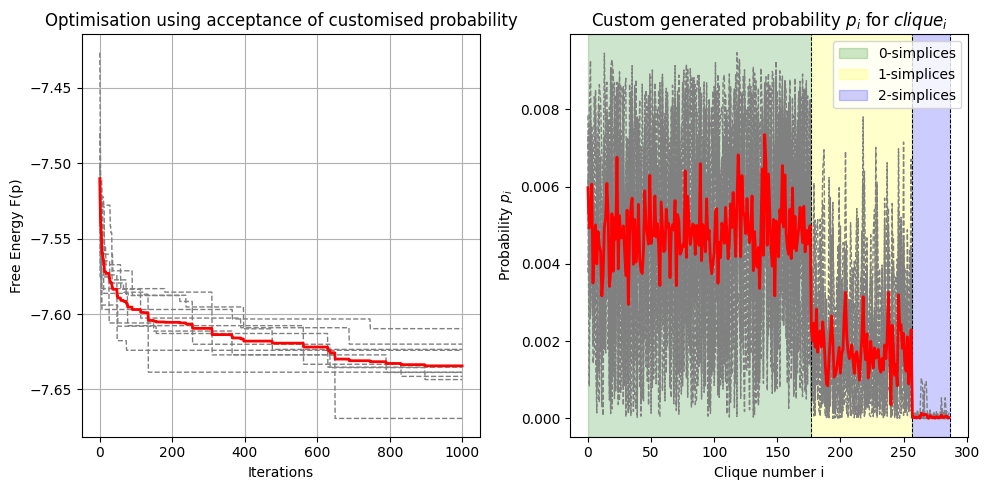

In [20]:
# Plotting the optimisation side by side
plt.figure(figsize=(10, 5))
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(1, 2, 1)
for i in range(N_simulations):
    plt.plot(free_energies[i], color='grey', linestyle='--', linewidth=1)
plt.plot(free_energies_average, color='red', linestyle='-', linewidth = 2)
plt.title('Optimisation using acceptance of customised probability')
plt.xlabel('Iterations')
plt.ylabel('Free Energy F(p)')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(N_simulations):
    plt.plot(free_energy_probabilities_test[i], color='grey', linestyle='--', linewidth=1)

# Add markers at the specified x-values
for marker_x in marker_x_values:
    plt.axvline(x=marker_x, color='black', linestyle='--', linewidth = 0.7)  # Add vertical dashed lines

# Plot averaged probabilities
plt.plot(free_energy_probabilities_test_average, color='red', linestyle='-', linewidth=2)

# Add colored background regions
plt.axvspan(xmin=0, xmax=N_nodes, alpha=0.2, color='green', label='0-simplices')
plt.axvspan(xmin=N_nodes, xmax=(N_nodes+N_edges), alpha=0.2, color='yellow', label='1-simplices')
plt.axvspan(xmin=(N_nodes+N_edges), xmax=(N_nodes+N_edges+N_triangles), alpha=0.2, color='blue', label='2-simplices')

plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Custom generated probability $p_i$ for $clique_i$')
plt.legend()
#plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Histogram overview of free energy calculation methods**  ~22min computation time for all matrices (811) with num_iterations = 100, cutoff = 0.7, max_dim = 3

In [52]:
free_energy_analytical = []
free_energy_direct_custom = []

cutoff = 0.7
max_dim = 3

for matrix in matrices:
    # Compute analytical free energy
    max_entropy_value, min_energy_value = analytical_functionals(matrix, cutoff, max_dim)
    free_energy_subject_3 = min_energy_value - max_entropy_value
    free_energy_analytical.append(free_energy_subject_3)

    # Compute direct free energy
    clique_complex, free_energy_subject_4, f_probabilities = computing_functionals_direct_custom(matrix, cutoff, max_dim)
    free_energy_direct_custom.append(free_energy_subject_4)

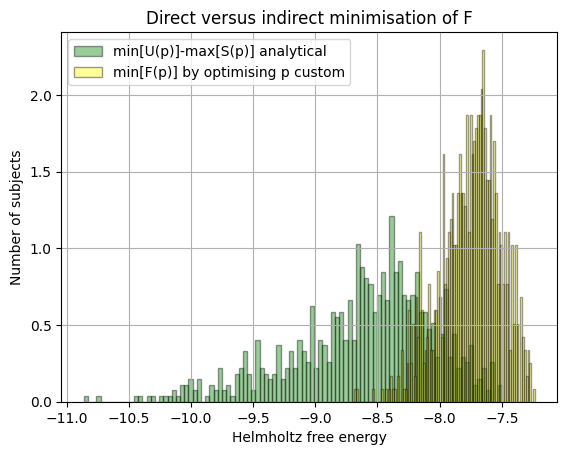

In [53]:
plt.hist(free_energy_analytical, bins=100, density=True, alpha=0.4, color='green', edgecolor='black', label = 'min[U(p)]-max[S(p)] analytical')
plt.hist(free_energy_direct_custom, bins=100, density=True, alpha=0.4, color='yellow', edgecolor='black', label = 'min[F(p)] by optimising p custom')
plt.grid(True)
plt.title('Direct versus indirect minimisation of F')
plt.ylabel('Number of subjects')
plt.xlabel('Helmholtz free energy')
plt.legend()
plt.show()

# Compare to PR-data REDO THIS PART WITH BETTER UNDERSTANDING??

In [46]:
# Import PR-HCP data
matrices_PR = [np.genfromtxt(file) for file in glob.glob('Cyril\PR_CorreMatrixes\*.txt')]

In [60]:
PR_free_energy_analytical = []
PR_free_energy_direct_custom = []

cutoff = 0.99
max_dim = 3

for matrix in matrices_PR[:10]:
    # Compute analytical free energy
    max_entropy_value, min_energy_value = analytical_functionals(matrix, cutoff, max_dim)
    free_energy_subject_3 = min_energy_value - max_entropy_value
    PR_free_energy_analytical.append(free_energy_subject_3)

    # Compute direct free energy
    clique_complex, free_energy_subject_4, f_probabilities = computing_functionals_direct_custom(matrix, cutoff, max_dim)
    PR_free_energy_direct_custom.append(free_energy_subject_4)

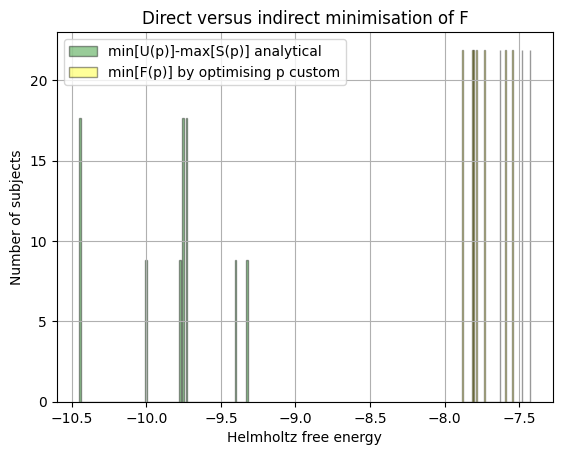

In [61]:
plt.hist(PR_free_energy_analytical, bins=100, density=True, alpha=0.4, color='green', edgecolor='black', label = 'min[U(p)]-max[S(p)] analytical')
plt.hist(PR_free_energy_direct_custom, bins=100, density=True, alpha=0.4, color='yellow', edgecolor='black', label = 'min[F(p)] by optimising p custom')
plt.grid(True)
plt.title('Direct versus indirect minimisation of F')
plt.ylabel('Number of subjects')
plt.xlabel('Helmholtz free energy')
plt.legend()
plt.show()

# Generate pruned matrix from time series data using phased randomisation

In [30]:
# Generate phase randomised time series from a given time series txt-file and store as new txt-file
path=glob.glob('HCPAging/*.txt')

for file in path:
    df=pd.read_csv(file,sep='\t',header=None)
    df = phase_randomization_dataframe(df)
    df.to_csv('PR_Cyril_HCP/PR_'+file[-118:], sep='\t', index=False, header=0)

In [31]:
# Create phase randomised correlation matrices from the phase randomised time series
path=glob.glob('PR_Cyril_HCP/*.txt')

for file in path:
    df = pd.read_csv(file, sep='\t')
    matrix = df.T.corr().to_numpy()
    np.savetxt('PR_Cyril_CorreMatrixes/Corr_matrix_' + file[-118:].split('/')[-1], matrix)

In [112]:
# Create list of correlation values for real data
real=pd.read_csv('HCPAging\HCA9956008_V1_rfMRI_REST2_Atlas_MSMAll_hp0_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T_connmatrix.txt',sep ='\t',header=None)
#real_corr=real.T.corr().to_numpy()
real_corr=real.to_numpy()
real_corr_flat = real_corr.flatten()

real=pd.read_csv((glob.glob('TimeSeries_HCPAging\REST2\*HCA9956008*.txt'))[0],sep ='\t',header=None)
real_corr=real.T.corr().to_numpy()
real_corr_flat = real_corr.flatten()

In [113]:
# Create list of correlation values for random data
random=pd.read_csv('PR_Cyril_HCP\PR_HCA9956008_V1_rfMRI_REST2_Atlas_MSMAll_hp0_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T_connmatrix.txt',sep ='\t',header=None)
random_corr=random.T.corr().to_numpy()
random_corr_flat = random_corr.flatten()

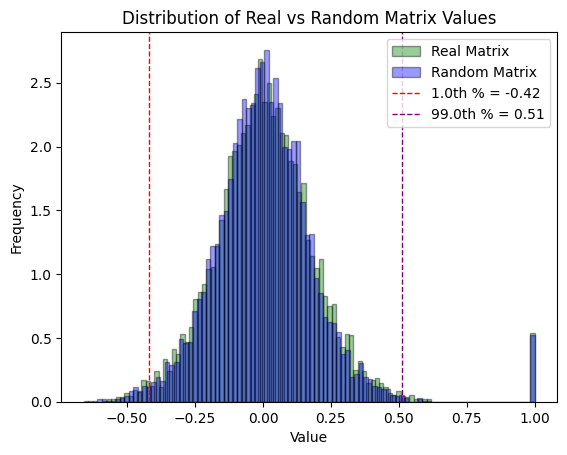

In [114]:
# Plot the distribution of correlation values for real vs random data
plt.hist(real_corr_flat, bins=100, density=True, label='Real Matrix', alpha=0.4, color='green', edgecolor='black')
plt.hist(random_corr_flat, bins=100, density=True, label='Random Matrix', alpha=0.4, color='blue', edgecolor='black')

# Calculate percentiles
q010 = np.quantile(random_corr_flat, 0.010)
q990 = np.quantile(random_corr_flat, 0.990)

# Draw red dotted lines at the 1.0th and 99.0th percentiles
plt.axvline(q010, color='red', linestyle='--', linewidth=1, label=f'1.0th % = {q010:.2f}')
plt.axvline(q990, color='purple', linestyle='--', linewidth=1, label=f'99.0th % = {q990:.2f}')

# Add legend to the plot
plt.legend()

# Optional: Add titles and labels
plt.title('Distribution of Real vs Random Matrix Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [99]:
# Example matrices
random_matrix = random_corr  # Random matrix
real_matrix = real_corr  # Real matrix, replace with your actual real matrix

# Compute the 2.5th and 97.5th percentiles of the random matrix
q025 = np.quantile(random_matrix, 0.010)
q975 = np.quantile(random_matrix, 0.990)

q025_p = np.percentile(random_matrix, 0.010)
q975_p = np.percentile(random_matrix, 0.990)

print(q025, q975)
print(q025_p, q975_p)

# Create a mask for elements in the real matrix that are NOT between q025 and q975
mask = (real_matrix < q025) | (real_matrix > q975)

# Apply mask to the real matrix
# Option 1: Set elements within the quantiles to 0 (or choose another value)
pruned_matrix = np.where(mask, real_matrix, 0)

# Print lowest correlation value in the absolute pruned_matrix
print(np.min(np.abs(pruned_matrix[pruned_matrix>0])))
print(np.max(np.abs(pruned_matrix[pruned_matrix>0])))

# Set all non-zero values to 1
#pruned_matrix = np.where(pruned_matrix != 0, 1, pruned_matrix)

# Option 2: If you want to completely remove these elements, it's a bit more complex
# as it would change the shape of the matrix. Typically, you'd work with the masked array
# or adapt your data structure for analyses that ignore these values.

# Show some of the pruned matrix values
print(pruned_matrix)  # Adjust as needed for your inspection

-0.4195807517878049 0.511588428322182
-0.6484145818907769 -0.4199323368211797
0.511738
1.0
[[1.       0.       0.       ... 0.       0.       0.      ]
 [0.       1.       0.       ... 0.       0.       0.      ]
 [0.       0.       1.       ... 0.       0.       0.      ]
 ...
 [0.       0.       0.       ... 1.       0.       0.623222]
 [0.       0.       0.       ... 0.       1.       0.      ]
 [0.       0.       0.       ... 0.623222 0.       1.      ]]


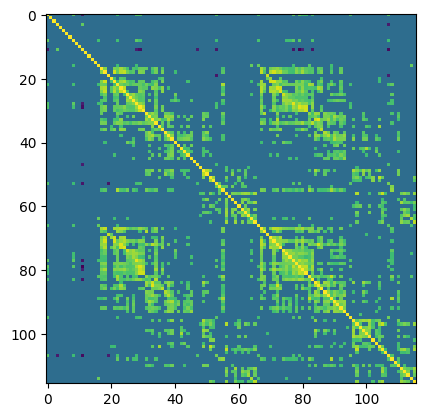

In [100]:
plt.imshow(pruned_matrix)

# Generate free energies from pruned data

Input: list of time series as dataset

Process: per time serie, generate correlation matrix and PR-corr matrix. Generate pruned matrix. Loop over all time series and save list of pruned matrices.

Output: list of pruned matrices

In [49]:
# Function that generates a list of pruned correlation matrices for a given path of a dataset of timeseries and the highest and lowest percentile as cutoff
def generate_pruned_data(path, lowest_percentile, highest_percentile):
    pruned_data = []

    for file in path:
        # Create corr_matrix Real Data
        real=pd.read_csv(file,sep ='\t',header=None)
        real_matrix=real.T.corr().to_numpy()

        # Create corr_matrix Random Data
        random=pd.read_csv(file,sep ='\t',header=None)
        random_matrix=random.T.corr().to_numpy()

        # Compute the lowest and highest desired percentiles of the random matrix
        q_low = np.quantile(random_matrix, lowest_percentile)
        q_high = np.quantile(random_matrix, highest_percentile)

        # Create a mask for elements in the real matrix that are NOT between the extreme percentiles
        mask = (real_matrix < q_low) | (real_matrix > q_high)

        # Apply mask to the real matrix
        # Option 1: Set elements within the quantiles to 0 (or choose another value)
        pruned_matrix = np.where(mask, real_matrix, 0)

        # Set all non-zero values to 1
        #pruned_matrix = np.where(pruned_matrix != 0, 1, pruned_matrix)

        np.savetxt('Pruned_data_HCPYoungAdult/REST2/pruned_' + file[-118:].split('/')[-1], pruned_matrix)

        pruned_data.append(pruned_matrix)
    
    return pruned_data

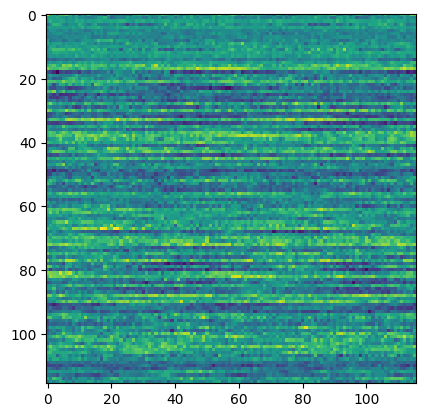

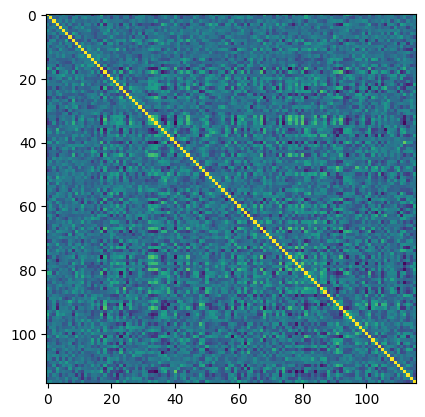

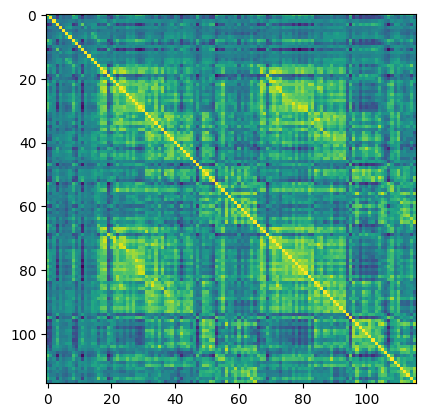

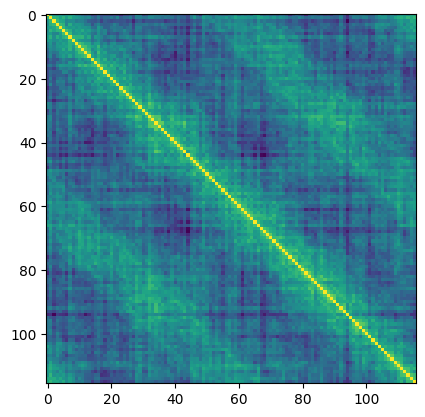

In [118]:
real=pd.read_csv((glob.glob('TimeSeries_HCPAging\REST2\*HCA9956008*.txt'))[0],sep ='\t',header=None)
plt.imshow(real)
plt.show()
real=real.T.corr().to_numpy()
plt.imshow(real)
plt.show()

real_2=pd.read_csv('HCPAging\HCA9956008_V1_rfMRI_REST2_Atlas_MSMAll_hp0_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T_connmatrix.txt',sep ='\t',header=None)
plt.imshow(real_2)
plt.show()

plt.imshow(pd.read_csv('PR_Cyril_HCP\PR_HCA9956008_V1_rfMRI_REST2_Atlas_MSMAll_hp0_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T_connmatrix.txt',sep ='\t',header=None).corr().to_numpy())
plt.show()

In [ ]:
pruned_data = generate_pruned_data(glob.glob('TimeSeries_HCPYoungAdult/REST2/*.txt'), 0.010, 0.990)

0.4024996050230156
1.0
-0.5054820505904284
1.0


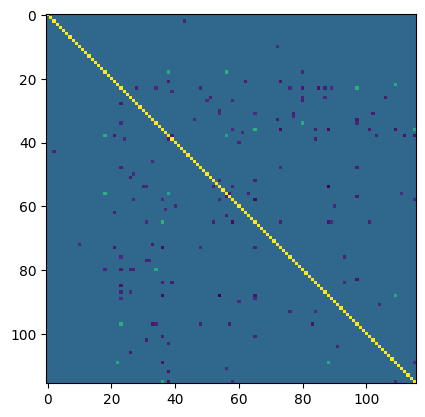

In [104]:
pruned_matrix = np.loadtxt('Pruned_data_HCPAging\REST2\pruned_HCA6102038_V1_rfMRI_REST2_Atlas_MSMAll_hp0_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T_connmatrix.txt')
print(np.min(np.abs(pruned_matrix[pruned_matrix>0])))
print(np.max(np.abs(pruned_matrix[pruned_matrix>0])))
print(np.min(pruned_matrix))
print(np.max(pruned_matrix))
plt.imshow(pruned_matrix)

# Free energy exploration for pruned data

In [13]:
# Generate the clique complex
def build_clique_complex_new(pruned_matrix):
    # Create the graph directly from the adjacency matrix
    G = nx.from_numpy_matrix(pruned_matrix)

    # Enumerate all cliques directly
    all_cliques = list(nx.enumerate_all_cliques(G))

    # max_clique_size
    max_clique_size = 3

    # Building the clique complex
    seen_cliques = {tuple(sorted(clique)) for clique in all_cliques if len(clique) <= max_clique_size}

    # Sort the list of sets based on the length of cliques and sorted vertices within each clique
    clique_complex = sorted(map(frozenset, seen_cliques), key=lambda x: (len(x), sorted(x)))

    return clique_complex

In [14]:
# Compute the free energy directly by approximating min_free_energy
def computing_functionals_direct_custom(matrix):
    # Build clique_complex
    clique_complex = build_clique_complex_new(matrix)
    # Generate connectivity and inverse matrix
    matrix, inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)

    # Compute the free energy directly by approximating min_free_energy
    free_energy_history, f_probabilities = simulated_annealing_free_energy(clique_complex, inverse_connectivity_matrix, 1000, initial_temperature=1.0, cooling_rate=0.95)

    # Compute analytical max entropy and min energy
    # Maximum shannon entropy from uniform distribution
    n = len(inverse_connectivity_matrix)
    p_Smax = np.ones(n) / n
    max_entropy_value = shannon_entropy(p_Smax)

    # Minimum internal energy from analytical solution
    min_energy_probabilities = (np.inner(matrix,[1]*len(matrix)))/np.sum(matrix)
    min_energy_value = energy_function(min_energy_probabilities, inverse_connectivity_matrix)

    # Analytical optimal free energy
    min_free_energy_value = min_energy_value - max_entropy_value

    return clique_complex, free_energy_history[-1], f_probabilities, max_entropy_value, min_energy_value, min_free_energy_value

In [39]:
# Generate phase randomised time series from a given time series txt-file and store as new txt-file
path=glob.glob('Pruned_data_HCPYoungAdult\REST1\*.txt')

free_energy_direct_custom = []
free_energy_analytical = []

for file in path:
    matrix = np.loadtxt(file)
    clique_complex, free_energy_subject_4, f_probabilities, max_entropy_value, min_energy_value, min_free_energy_value = computing_functionals_direct_custom(matrix)
    free_energy_analytical.append(min_free_energy_value)
    free_energy_direct_custom.append(free_energy_subject_4)

In [40]:
np.savetxt('F_pruned_HCPYoungAdult_REST1.txt', free_energy_direct_custom)

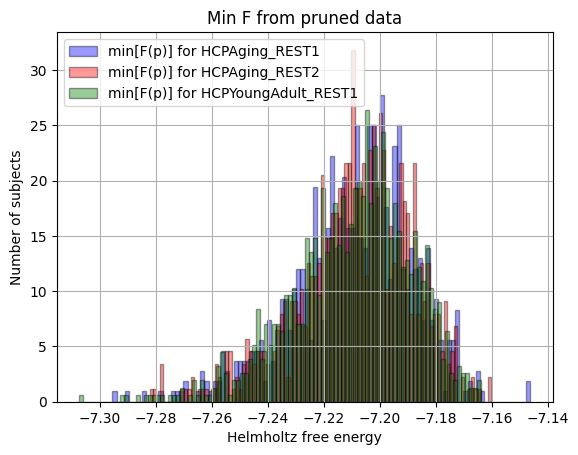

In [102]:
#plt.hist(free_energy_analytical, bins=100, density=True, alpha=0.4, color='red', edgecolor='black', label = 'min[U(p)]-max[S(p)] analytical')
plt.hist(np.loadtxt('F_pruned_HCPAging_REST1.txt'), bins=100, density=True, alpha=0.4, color='blue', edgecolor='black', label = 'min[F(p)] for HCPAging_REST1')
plt.hist(np.loadtxt('F_pruned_HCPAging_REST2.txt'), bins=100, density=True, alpha=0.4, color='red', edgecolor='black', label = 'min[F(p)] for HCPAging_REST2')
plt.hist(np.loadtxt('F_pruned_HCPYoungAdult_REST1.txt'), bins=100, density=True, alpha=0.4, color='green', edgecolor='black', label = 'min[F(p)] for HCPYoungAdult_REST1')
#plt.hist(np.loadtxt('F_pruned_HCPYoungAdult_REST2.txt'), bins=100, density=True, alpha=0.4, color='yellow', edgecolor='black', label = 'min[F(p)] for HCPYoungAdult_REST2')
plt.grid(True)
plt.title('Min F from pruned data')
plt.ylabel('Number of subjects')
plt.xlabel('Helmholtz free energy')
plt.legend()
plt.show()

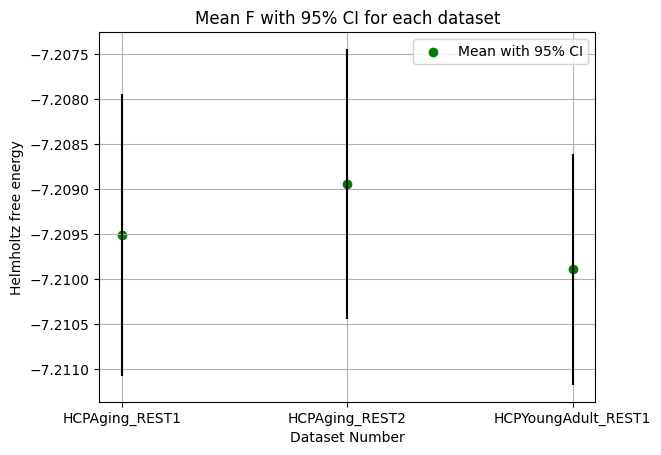

In [42]:
# Try to plot the confidence interval to later compare multiple aging datasets?

# Load data
data_HCPAging_REST1 = np.loadtxt('F_pruned_HCPAging_REST1.txt')
data_HCPAging_REST2 = np.loadtxt('F_pruned_HCPAging_REST2.txt')
data_HCPYoungAdult_REST1 = np.loadtxt('F_pruned_HCPYoungAdult_REST1.txt')

# Calculate mean and confidence interval for each dataset
mean_HCPAging_REST1 = np.mean(data_HCPAging_REST1)
mean_HCPAging_REST2 = np.mean(data_HCPAging_REST2)
mean_HCPYoungAdult_REST1 = np.mean(data_HCPYoungAdult_REST1)

std_err_HCPAging_REST1 = 1.96 * np.std(data_HCPAging_REST1) / np.sqrt(len(data_HCPAging_REST1))
std_err_HCPAging_REST2 = 1.96 * np.std(data_HCPAging_REST2) / np.sqrt(len(data_HCPAging_REST2))
std_err_HCPYoungAdult_REST1 = 1.96 * np.std(data_HCPYoungAdult_REST1) / np.sqrt(len(data_HCPYoungAdult_REST1))

# Create a scatterplot
plt.scatter([1, 2, 3], [mean_HCPAging_REST1, mean_HCPAging_REST2, mean_HCPYoungAdult_REST1], color='green', label='Mean with 95% CI')

# Plot error bars
plt.errorbar([1, 2, 3], [mean_HCPAging_REST1, mean_HCPAging_REST2, mean_HCPYoungAdult_REST1], yerr=[std_err_HCPAging_REST1, std_err_HCPAging_REST2, std_err_HCPYoungAdult_REST1], fmt='none', ecolor='black')

plt.grid(True)
plt.title('Mean F with 95% CI for each dataset')
plt.ylabel('Helmholtz free energy')
plt.xlabel('Dataset Number')
plt.xticks([1, 2, 3], ['HCPAging_REST1', 'HCPAging_REST2', 'HCPYoungAdult_REST1'])
plt.legend()
plt.show()


In [14]:
# Import raw time series for V1, change V1 into V2 to import V2
path = glob.glob('C:\\Users\\cyril\\Downloads\\HCPAging\\HCPAging\\*\\V1\\*_REST1\\*Schaefer2018*100P*\\*.txt') # For HCPAging set [-118:]
#path = glob.glob('C:\\Users\\cyril\\Downloads\\HCPYoungAdult\\HCPYoungAdult\\*\\*_REST2\\*Schaefer2018*100P*\\*.txt') # For HCPYoungAdult set [-114:]

#"C:\Users\cyril\Downloads\HCPYoungAdult\HCPYoungAdult\592455\rfMRI_REST1\Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T\592455_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T_connmatrix.txt"

for file in path:
    df=pd.read_csv(file,sep='\t',header=None)
    df = phase_randomization_dataframe(df)
    df.to_csv('TimeSeries_HCPAging/REST1/Raw_'+file[-118:], sep='\t', index=False, header=0)

# Compare scipy.optimize vs my custom optimisation

**Check first scipy.optimize**

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def generate_scale_free_network(num_nodes, m_initial, m_links):
    """
    Generate a scale-free network using a simplified preferential attachment model.
   
    Parameters:
    - num_nodes: Total number of nodes in the network.
    - m_initial: Number of initial interconnected nodes.
    - m_links: Number of edges to attach from a new node to existing nodes.
   
    Returns:
    - adjacency_matrix: The adjacency matrix representing the scale-free network.
    """
    initial_network = np.ones((m_initial, m_initial)) - np.eye(m_initial)
    adjacency_matrix = np.zeros((num_nodes, num_nodes))
    adjacency_matrix[:m_initial, :m_initial] = initial_network
   
    for new_node in range(m_initial, num_nodes):
        degree_sum = np.sum(adjacency_matrix[:new_node, :new_node])
        if degree_sum == 0: continue
           
        prob_distribution = np.sum(adjacency_matrix[:new_node, :new_node], axis=1) / degree_sum
        target_nodes = np.random.choice(new_node, size=m_links, replace=False, p=prob_distribution)
       
        adjacency_matrix[new_node, target_nodes] = 1
        adjacency_matrix[target_nodes, new_node] = 1
 
    adjacency_matrix = np.maximum(adjacency_matrix, adjacency_matrix.T)
    np.fill_diagonal(adjacency_matrix, 1)  # Ensuring positive definiteness
    return adjacency_matrix
 
def objective(x, Q, t):
    """
    Define the objective function for free energy minimization.
   
    Parameters:
    - x: Variable vector.
    - Q: Coefficient matrix for the quadratic term.
    - t: Constant coefficient for the entropy term.
   
    Returns:
    - The value of the objective function.
    """
    entropy_term = - np.sum(x * np.log(np.maximum(x, 1e-10)))  # Avoid log(0)
    return x.T @ Q @ x - t * entropy_term

In [293]:
# Generate a scale-free network for Q
path = glob.glob('Pruned_data_HCPAging\V2\*.txt')
N_simulations = 10
free_energies = []
free_energy_probabilities_test = []


for file in path[:N_simulations]:
    matrix = np.loadtxt(file)
    clique_complex = build_clique_complex_new(matrix)
    matrix, inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)
    Q = matrix

    # Optimization settings
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = [(1e-10, None) for _ in range(len(Q))]
    x0 = np.full(len(Q), 1/len(Q))  # Initial guess

    # Store the latest optimized x0 and all free energies during minimization
    latest_x0 = None
    all_values = []

    # Callback function to collect values during minimization
    def callback(x):
        all_values.append(objective(x, Q, t==1))

    #for t in t_values:
    #    result = minimize(objective, x0, args=(Q, t), method='SLSQP', constraints=cons, bounds=bounds)
    #    minimized_values.append(result.fun)
    #    latest_x0 = result.x  # Update the latest optimized x0

    result = minimize(objective, x0, args=(Q, t==1), method='SLSQP', constraints=cons, bounds=bounds, callback=callback)

    free_energies.append(all_values) # Add the optimisation history of free energies for each file
    free_energy_probabilities_test.append(result.x) # Add the optimal probability distribution acc to optimisation for each file

In [294]:
free_energies_average = [sum(x) / len(x) for x in zip(*free_energies)]
free_energy_probabilities_test_average = [sum(x) / len(x) for x in zip(*free_energy_probabilities_test)]

In [295]:
simplices_length = nodes_probabilities(clique_complex, distribution_type='custom')[0]

N_nodes = len(simplices_length[0])
N_edges = len(simplices_length[1])
N_triangles = len(simplices_length[2])

# Define the x-values to mark the transition
marker_x_values = [N_nodes, (N_nodes+N_edges), (N_nodes+N_edges+N_triangles)]

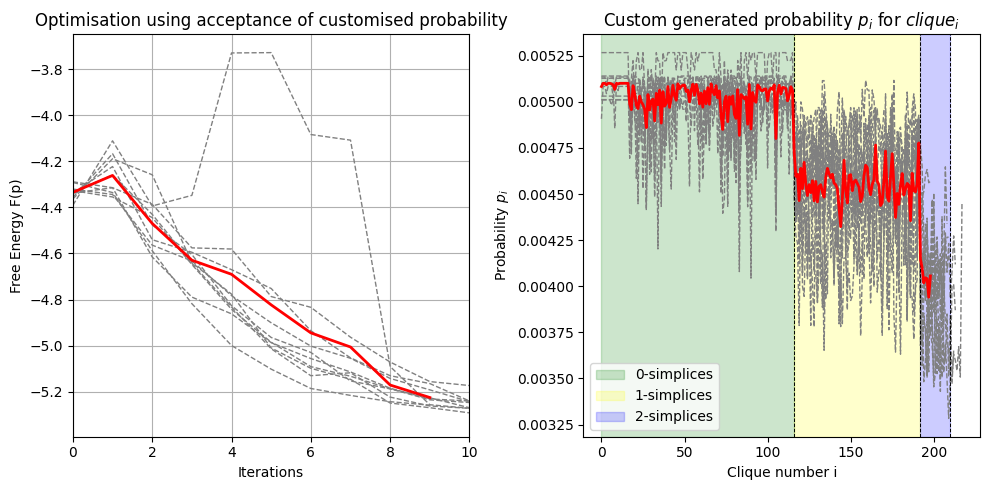

In [296]:
# Plotting the optimisation side by side
plt.figure(figsize=(10, 5))
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(1, 2, 1)
for i in range(len(free_energies)):
    plt.plot(free_energies[i], color='grey', linestyle='--', linewidth=1)
plt.plot(free_energies_average, color='red', linestyle='-', linewidth = 2)
plt.xlim(0,len(min(free_energies, key=len)))
plt.title('Optimisation using acceptance of customised probability')
plt.xlabel('Iterations')
plt.ylabel('Free Energy F(p)')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(len(free_energy_probabilities_test)):
    plt.plot(free_energy_probabilities_test[i], color='grey', linestyle='--', linewidth=1)

# Add markers at the specified x-values
for marker_x in marker_x_values:
    plt.axvline(x=marker_x, color='black', linestyle='--', linewidth = 0.7)  # Add vertical dashed lines

# Plot averaged probabilities
plt.plot(free_energy_probabilities_test_average, color='red', linestyle='-', linewidth=2)

# Add colored background regions
plt.axvspan(xmin=0, xmax=N_nodes, alpha=0.2, color='green', label='0-simplices')
plt.axvspan(xmin=N_nodes, xmax=(N_nodes+N_edges), alpha=0.2, color='yellow', label='1-simplices')
plt.axvspan(xmin=(N_nodes+N_edges), xmax=(N_nodes+N_edges+N_triangles), alpha=0.2, color='blue', label='2-simplices')

plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Custom generated probability $p_i$ for $clique_i$')
plt.legend()
#plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Check for custom pdf**

In [287]:
# Define simulated annealing for energy
def custom_free_energy_minimiser(clique_complex, matrix, num_iterations):
    
    current_probabilities = generate_probability_list(clique_complex, 'custom')
    current_value = objective(current_probabilities, matrix, 1)
    history = []

    for _ in range(num_iterations):

        # Generate a new set of probabilities
        new_probabilities = generate_probability_list(clique_complex, 'custom')

        # Evaluate the entropy of the new set of probabilities
        new_value = objective(new_probabilities, matrix, 1)

        # Accept the new set of probabilities if its entropy is greater
        if new_value < current_value:
            current_probabilities = new_probabilities
            current_value = new_value

        history.append(current_value)

    return history, current_probabilities

In [306]:
def objective(x, Q, t):
    entropy_term = - np.sum(x * np.log(np.maximum(x, 1e-10)))  # Avoid log(0)
    return x.T @ Q @ x - t * entropy_term

In [303]:
# Example for generating energy and entropy data from a given matrix
num_iterations_free_energy = 1000
free_energies = []
free_energy_probabilities_test = []
N_simulations = 4

# Generate phase randomised time series from a given time series txt-file and store as new txt-file
path=glob.glob('Pruned_data_HCPAging\V2\*.txt')

for file in path[:N_simulations]:
    matrix = np.loadtxt(file)
    clique_complex = build_clique_complex_new(matrix)
    matrix, inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)
    free_energy_history, f_probabilities = simulated_annealing_free_energy(clique_complex, inverse_connectivity_matrix, num_iterations_free_energy)
    free_energies.append(free_energy_history)
    free_energy_probabilities_test.append(f_probabilities)

free_energies_average = [sum(x) / len(x) for x in zip(*free_energies)]
free_energy_probabilities_test_average = [sum(x) / len(x) for x in zip(*free_energy_probabilities_test)]

In [304]:
simplices_length = nodes_probabilities(clique_complex, distribution_type='custom')[0]

N_nodes = len(simplices_length[0])
N_edges = len(simplices_length[1])
N_triangles = len(simplices_length[2])

# Define the x-values to mark the transition
marker_x_values = [N_nodes, (N_nodes+N_edges), (N_nodes+N_edges+N_triangles)]

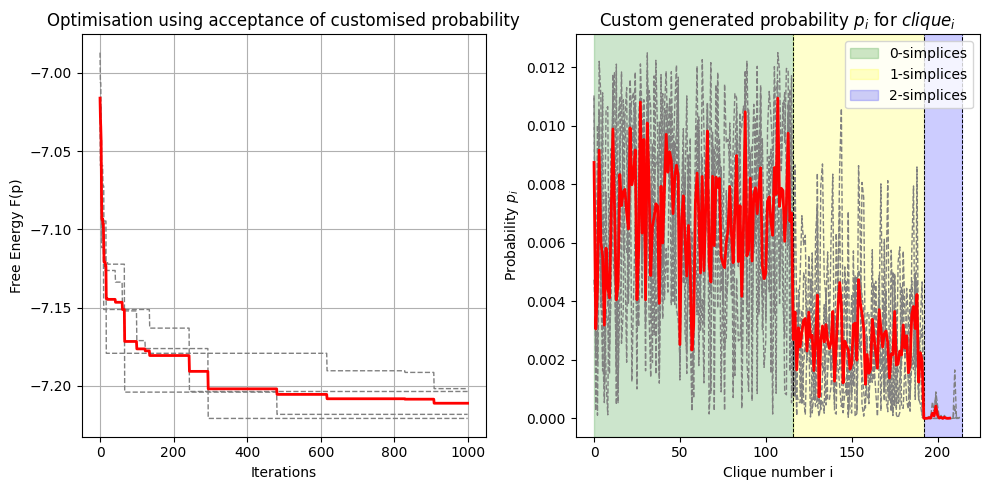

In [305]:
# Plotting the optimisation side by side
plt.figure(figsize=(10, 5))
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(1, 2, 1)
for i in range(N_simulations):
    plt.plot(free_energies[i], color='grey', linestyle='--', linewidth=1)
plt.plot(free_energies_average, color='red', linestyle='-', linewidth = 2)
plt.title('Optimisation using acceptance of customised probability')
plt.xlabel('Iterations')
plt.ylabel('Free Energy F(p)')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(N_simulations):
    plt.plot(free_energy_probabilities_test[i], color='grey', linestyle='--', linewidth=1)

# Add markers at the specified x-values
for marker_x in marker_x_values:
    plt.axvline(x=marker_x, color='black', linestyle='--', linewidth = 0.7)  # Add vertical dashed lines

# Plot averaged probabilities
plt.plot(free_energy_probabilities_test_average, color='red', linestyle='-', linewidth=2)

# Add colored background regions
plt.axvspan(xmin=0, xmax=N_nodes, alpha=0.2, color='green', label='0-simplices')
plt.axvspan(xmin=N_nodes, xmax=(N_nodes+N_edges), alpha=0.2, color='yellow', label='1-simplices')
plt.axvspan(xmin=(N_nodes+N_edges), xmax=(N_nodes+N_edges+N_triangles), alpha=0.2, color='blue', label='2-simplices')

plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Custom generated probability $p_i$ for $clique_i$')
plt.legend()
#plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Optimisation comparison F(p)**

In [341]:
# Compute free energy for given inverse matrix, probability list and temperature
def free_energy_functional(x, Q, t):
    entropy_term = - np.sum(x * np.log(np.maximum(x, 1e-10)))  # Avoid log(0)
    return x.T @ Q @ x - t * entropy_term

In [342]:
# Compute internal energy for given inverse matrix, probability list and temperature
def internal_energy_functional(x, Q, t):
    return x.T @ Q @ x

In [308]:
# Define custom minimiser
def custom_energy_minimiser(function, clique_complex, matrix, num_iterations):
    
    current_probabilities = generate_probability_list(clique_complex, 'custom')
    current_value = function(current_probabilities, matrix, 1)
    history = []

    for _ in range(num_iterations):

        # Generate a new set of probabilities
        new_probabilities = generate_probability_list(clique_complex, 'custom')

        # Evaluate the entropy of the new set of probabilities
        new_value = function(new_probabilities, matrix, 1)

        # Accept the new set of probabilities if its entropy is greater
        if new_value < current_value:
            current_probabilities = new_probabilities
            current_value = new_value

        history.append(current_value)

    return history, current_probabilities

In [316]:
# Generate the average list of a list of lists
def average_list(list_of_lists):
    return [sum(x) / len(x) for x in zip(*list_of_lists)]

In [331]:
# Scipy optimisation
def scipy_optimiser(function, Q):
    # Optimization settings
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = [(1e-10, None) for _ in range(len(Q))]
    x0 = np.full(len(Q), 1/len(Q))  # Initial guess

    # Store the latest optimized x0 and all free energies during minimization
    all_values = []

    # Callback function to collect values during minimization
    def callback(x):
        all_values.append(objective(x, Q, t==1))

    #for t in t_values:
    #    result = minimize(objective, x0, args=(Q, t), method='SLSQP', constraints=cons, bounds=bounds)
    #    minimized_values.append(result.fun)
    #    latest_x0 = result.x  # Update the latest optimized x0

    result = minimize(function, x0, args=(Q, t==1), method='SLSQP', constraints=cons, bounds=bounds, callback=callback)
    return all_values, result.x # Returns free_energy_history, f_probabilities

In [385]:
def minimisation_comparison(function, filepath, N_simulations):
    # Example for generating energy and entropy data from a given matrix
    num_iterations_free_energy = 1000
    free_energies_custom = []
    free_energy_probabilities_custom = []
    free_energies_scipy = []
    free_energy_probabilities_scipy = []

    # Generate phase randomised time series from a given time series txt-file and store as new txt-file
    path=glob.glob(filepath)

    for file in path[:N_simulations]:
        # Generate necessary properties of the file
        matrix = np.loadtxt(file)
        clique_complex = build_clique_complex_new(matrix)
        matrix, inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)

        # Custom optimisation
        free_energy_history_custom, f_probabilities_custom = custom_energy_minimiser(function, clique_complex, inverse_connectivity_matrix, num_iterations_free_energy)
        free_energies_custom.append(free_energy_history_custom)
        free_energy_probabilities_custom.append(f_probabilities_custom)

        # Scipy optimisation
        free_energy_history_scipy, f_probabilities_scipy = scipy_optimiser(function, inverse_connectivity_matrix)
        free_energies_scipy.append(free_energy_history_scipy)
        free_energy_probabilities_scipy.append(f_probabilities_scipy)

    return free_energies_scipy, free_energies_custom, free_energy_probabilities_scipy, free_energy_probabilities_custom

In [386]:
N_simulations = 10

In [387]:
free_energies_scipy, free_energies_custom, free_energy_probabilities_scipy, free_energy_probabilities_custom = minimisation_comparison(free_energy_functional, 'Pruned_data_HCPAging\V2\*.txt', 10)

c:\Users\cyril\anaconda3\envs\TDA_danillo\lib\site-packages\scipy\optimize\_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [388]:
F_average_scipy = average_list(free_energies_scipy)
F_average_custom = average_list(free_energies_custom)
F_average_endprobabilities_scipy = average_list(free_energy_probabilities_scipy)
F_average_endprobabilities_custom = average_list(free_energy_probabilities_custom)

In [389]:
simplices_length = nodes_probabilities(clique_complex, distribution_type='custom')[0]

N_nodes = len(simplices_length[0])
N_edges = len(simplices_length[1])
N_triangles = len(simplices_length[2])

# Define the x-values to mark the transition
marker_x_values = [N_nodes, (N_nodes+N_edges), (N_nodes+N_edges+N_triangles)]

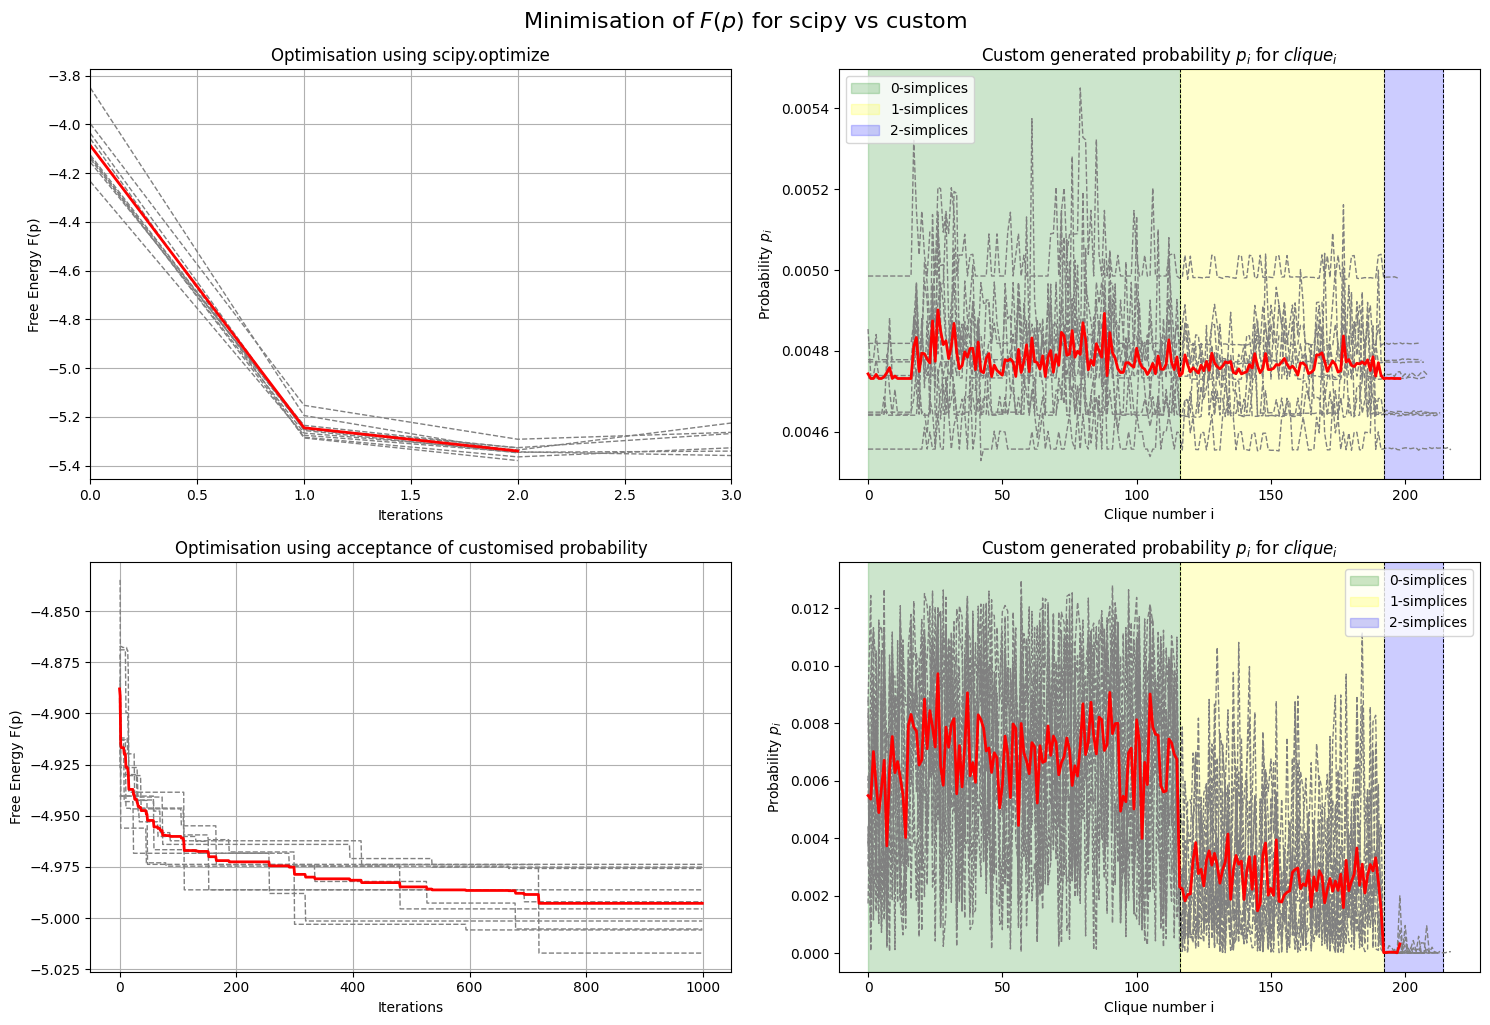

In [390]:
# Plotting the optimisation side by side
plt.figure(figsize=(15, 10))
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(2, 2, 1)
for i in range(N_simulations):
    plt.plot(free_energies_scipy[i], color='grey', linestyle='--', linewidth=1)
plt.plot(F_average_scipy, color='red', linestyle='-', linewidth = 2)
plt.xlim(0,len(min(free_energies_scipy, key=len)))
plt.title('Optimisation using scipy.optimize')
plt.xlabel('Iterations')
plt.ylabel('Free Energy F(p)')
plt.grid(True)

plt.subplot(2, 2, 2)
for i in range(N_simulations):
    plt.plot(free_energy_probabilities_scipy[i], color='grey', linestyle='--', linewidth=1)

# Add markers at the specified x-values
for marker_x in marker_x_values:
    plt.axvline(x=marker_x, color='black', linestyle='--', linewidth = 0.7)  # Add vertical dashed lines

# Plot averaged probabilities
plt.plot(F_average_endprobabilities_scipy, color='red', linestyle='-', linewidth=2)

# Add colored background regions
plt.axvspan(xmin=0, xmax=N_nodes, alpha=0.2, color='green', label='0-simplices')
plt.axvspan(xmin=N_nodes, xmax=(N_nodes+N_edges), alpha=0.2, color='yellow', label='1-simplices')
plt.axvspan(xmin=(N_nodes+N_edges), xmax=(N_nodes+N_edges+N_triangles), alpha=0.2, color='blue', label='2-simplices')

plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Custom generated probability $p_i$ for $clique_i$')
plt.legend()
#plt.grid(True)

plt.subplot(2, 2, 3)
for i in range(N_simulations):
    plt.plot(free_energies_custom[i], color='grey', linestyle='--', linewidth=1)
plt.plot(F_average_custom, color='red', linestyle='-', linewidth = 2)
plt.title('Optimisation using acceptance of customised probability')
plt.xlabel('Iterations')
plt.ylabel('Free Energy F(p)')
plt.grid(True)

plt.subplot(2, 2, 4)
for i in range(N_simulations):
    plt.plot(free_energy_probabilities_custom[i], color='grey', linestyle='--', linewidth=1)

# Add markers at the specified x-values
for marker_x in marker_x_values:
    plt.axvline(x=marker_x, color='black', linestyle='--', linewidth = 0.7)  # Add vertical dashed lines

# Plot averaged probabilities
plt.plot(F_average_endprobabilities_custom, color='red', linestyle='-', linewidth=2)

# Add colored background regions
plt.axvspan(xmin=0, xmax=N_nodes, alpha=0.2, color='green', label='0-simplices')
plt.axvspan(xmin=N_nodes, xmax=(N_nodes+N_edges), alpha=0.2, color='yellow', label='1-simplices')
plt.axvspan(xmin=(N_nodes+N_edges), xmax=(N_nodes+N_edges+N_triangles), alpha=0.2, color='blue', label='2-simplices')

plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Custom generated probability $p_i$ for $clique_i$')
plt.legend()
#plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.suptitle('Minimisation of $F(p)$ for scipy vs custom', fontsize=16, y=1.02)
plt.show()

In [391]:
internal_energies_scipy, internal_energies_custom, internal_energy_probabilities_scipy, internal_energy_probabilities_custom = minimisation_comparison(internal_energy_functional, 'Pruned_data_HCPAging\V2\*.txt', 10)

In [392]:
U_average_scipy = average_list(internal_energies_scipy)
U_average_custom = average_list(internal_energies_custom)
U_average_endprobabilities_scipy = average_list(internal_energy_probabilities_scipy)
U_average_endprobabilities_custom = average_list(internal_energy_probabilities_custom)

In [393]:
simplices_length = nodes_probabilities(clique_complex, distribution_type='custom')[0]

N_nodes = len(simplices_length[0])
N_edges = len(simplices_length[1])
N_triangles = len(simplices_length[2])

# Define the x-values to mark the transition
marker_x_values = [N_nodes, (N_nodes+N_edges), (N_nodes+N_edges+N_triangles)]

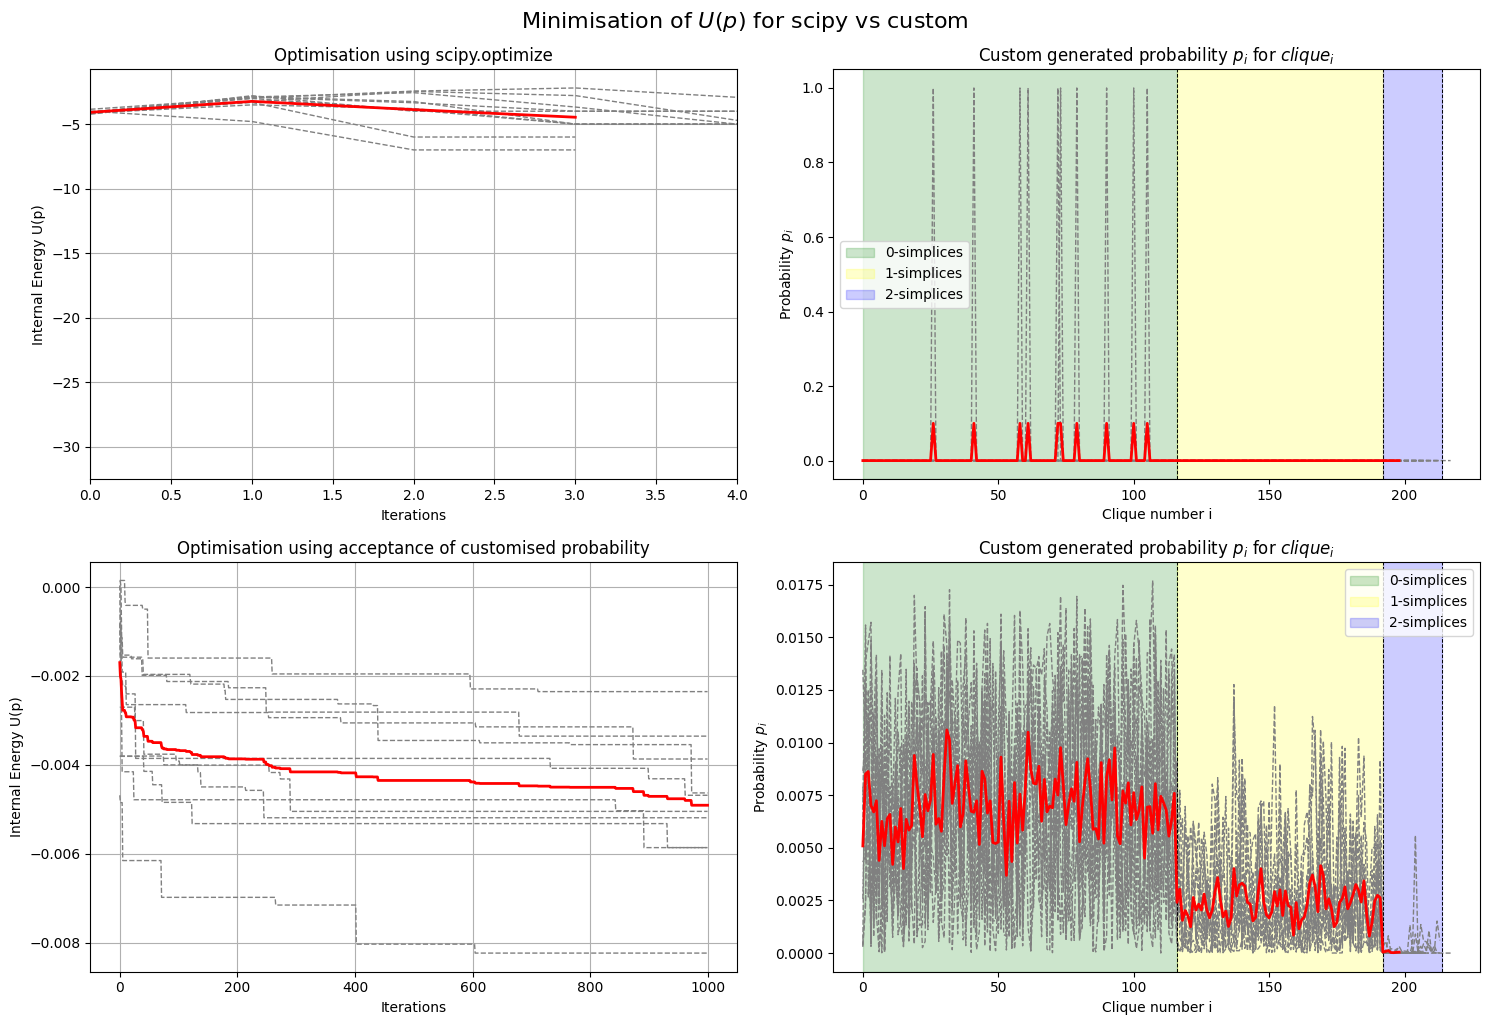

In [394]:
# Plotting the optimisation side by side
plt.figure(figsize=(15, 10))
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(2, 2, 1)
for i in range(N_simulations):
    plt.plot(internal_energies_scipy[i], color='grey', linestyle='--', linewidth=1)
plt.plot(U_average_scipy, color='red', linestyle='-', linewidth = 2)
plt.xlim(0,len(min(internal_energies_scipy, key=len)))
plt.title('Optimisation using scipy.optimize')
plt.xlabel('Iterations')
plt.ylabel('Internal Energy U(p)')
plt.grid(True)

plt.subplot(2, 2, 2)
for i in range(N_simulations):
    plt.plot(internal_energy_probabilities_scipy[i], color='grey', linestyle='--', linewidth=1)

# Add markers at the specified x-values
for marker_x in marker_x_values:
    plt.axvline(x=marker_x, color='black', linestyle='--', linewidth = 0.7)  # Add vertical dashed lines

# Plot averaged probabilities
plt.plot(U_average_endprobabilities_scipy, color='red', linestyle='-', linewidth=2)

# Add colored background regions
plt.axvspan(xmin=0, xmax=N_nodes, alpha=0.2, color='green', label='0-simplices')
plt.axvspan(xmin=N_nodes, xmax=(N_nodes+N_edges), alpha=0.2, color='yellow', label='1-simplices')
plt.axvspan(xmin=(N_nodes+N_edges), xmax=(N_nodes+N_edges+N_triangles), alpha=0.2, color='blue', label='2-simplices')

plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Custom generated probability $p_i$ for $clique_i$')
plt.legend()
#plt.grid(True)

plt.subplot(2, 2, 3)
for i in range(N_simulations):
    plt.plot(internal_energies_custom[i], color='grey', linestyle='--', linewidth=1)
plt.plot(U_average_custom, color='red', linestyle='-', linewidth = 2)
plt.title('Optimisation using acceptance of customised probability')
plt.xlabel('Iterations')
plt.ylabel('Internal Energy U(p)')
plt.grid(True)

plt.subplot(2, 2, 4)
for i in range(N_simulations):
    plt.plot(internal_energy_probabilities_custom[i], color='grey', linestyle='--', linewidth=1)

# Add markers at the specified x-values
for marker_x in marker_x_values:
    plt.axvline(x=marker_x, color='black', linestyle='--', linewidth = 0.7)  # Add vertical dashed lines

# Plot averaged probabilities
plt.plot(U_average_endprobabilities_custom, color='red', linestyle='-', linewidth=2)

# Add colored background regions
plt.axvspan(xmin=0, xmax=N_nodes, alpha=0.2, color='green', label='0-simplices')
plt.axvspan(xmin=N_nodes, xmax=(N_nodes+N_edges), alpha=0.2, color='yellow', label='1-simplices')
plt.axvspan(xmin=(N_nodes+N_edges), xmax=(N_nodes+N_edges+N_triangles), alpha=0.2, color='blue', label='2-simplices')

plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Custom generated probability $p_i$ for $clique_i$')
plt.legend()
#plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.suptitle('Minimisation of $U(p)$ for scipy vs custom', fontsize=16, y=1.02)
plt.show()